**Nome**: Gustavo Miguel Ferreira da Silva

**Email**: gmfs@cesar.school

Link do dataset: [link text](https://www.kaggle.com/datasets/mloey1/ahcd1)




# Carregando o dataset + alguns manipulaões

In [21]:
import kagglehub
import os
import argparse
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.optim.lr_scheduler import StepLR

# Download latest version
path = kagglehub.dataset_download("mloey1/ahcd1")

file_list = os.listdir(path)

print("Files in the dataset directory:")
for file_name in file_list:
    print(file_name)

Using Colab cache for faster access to the 'ahcd1' dataset.
Files in the dataset directory:
Arabic Handwritten Characters Dataset CSV
arabic handwritten characters dataset csv
Train+Test Images Matlab.mat
csvTestLabel 3360x1.csv
Train Images 13440x32x32
train images 13440x32x32
csvTrainImages 13440x1024.csv
Test Images 3360x32x32
test images 3360x32x32
csvTestImages 3360x1024.csv
csvTrainLabel 13440x1.csv


## Buscando os dados de treino

In [22]:
import pandas as pd

# Construct the full paths to the training image and label CSV files
train_images_path = os.path.join(path, 'csvTrainImages 13440x1024.csv')
train_labels_path = os.path.join(path, 'csvTrainLabel 13440x1.csv')

# Load the training images and labels
train_images_df = pd.read_csv(train_images_path)
train_labels_df = pd.read_csv(train_labels_path)

print("Training Images DataFrame head:")
print(train_images_df.head())
print("\nTraining Labels DataFrame head:")
print(train_labels_df.head())

Training Images DataFrame head:
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.896  0.897  0.898  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.899  0.900  0.901  0.902  0.903  0.904  0.905  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 1024 columns]

Training Labels DataFrame head:
   1
0  1
1  1
2  1
3  1
4  1


**Reasoning**:
To fully load the dataset as per the subtask, I also need to load the test images and labels into Pandas DataFrames, similar to how the training data was loaded. This ensures all relevant CSV data files are loaded into suitable data structures.



## Buscando os dados de teste

In [23]:
import pandas as pd

# Construct the full paths to the test image and label CSV files
test_images_path = os.path.join(path, 'csvTestImages 3360x1024.csv')
test_labels_path = os.path.join(path, 'csvTestLabel 3360x1.csv')

# Load the test images and labels
test_images_df = pd.read_csv(test_images_path)
test_labels_df = pd.read_csv(test_labels_path)

print("Test Images DataFrame head:")
print(test_images_df.head())
print("\nTest Labels DataFrame head:")
print(test_labels_df.head())

Test Images DataFrame head:
   0  0.1  0.2  0.3  0.4  0.5  0.6  0.7  0.8  0.9  ...  0.919  0.920  0.921  \
0  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
1  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
2  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
3  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   
4  0    0    0    0    0    0    0    0    0    0  ...      0      0      0   

   0.922  0.923  0.924  0.925  0.926  0.927  0.928  
0      0      0      0      0      0      0      0  
1      0      0      0      0      0      0      0  
2      0      0      0      0      0      0      0  
3      0      0      0      0      0      0      0  
4      0      0      0      0      0      0      0  

[5 rows x 1024 columns]

Test Labels DataFrame head:
   1
0  1
1  2
2  2
3  3
4  3


## Limpando os dados encontrados - checando valores faltantes


In [24]:
print("Missing values in train_images_df:")
print(train_images_df.isnull().sum().sum())

print("\nMissing values in train_labels_df:")
print(train_labels_df.isnull().sum().sum())

print("\nMissing values in test_images_df:")
print(test_images_df.isnull().sum().sum())

print("\nMissing values in test_labels_df:")
print(test_labels_df.isnull().sum().sum())

Missing values in train_images_df:
0

Missing values in train_labels_df:
0

Missing values in test_images_df:
0

Missing values in test_labels_df:
0


Como pode perceber nenhum valor faltante foi encontrado, hora de examinar os tipos de dados de cada coluna



In [25]:
print("\nData types for train_images_df:")
print(train_images_df.info())

print("\nData types for train_labels_df:")
print(train_labels_df.info())

print("\nData types for test_images_df:")
print(test_images_df.info())

print("\nData types for test_labels_df:")
print(test_labels_df.info())


Data types for train_images_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Columns: 1024 entries, 0 to 0.905
dtypes: int64(1024)
memory usage: 105.0 MB
None

Data types for train_labels_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13439 entries, 0 to 13438
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       13439 non-null  int64
dtypes: int64(1)
memory usage: 105.1 KB
None

Data types for test_images_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Columns: 1024 entries, 0 to 0.928
dtypes: int64(1024)
memory usage: 26.2 MB
None

Data types for test_labels_df:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3359 entries, 0 to 3358
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   1       3359 non-null   int64
dtypes: int64(1)
memory usage: 26.4 KB
None


Verificando os intervalos de valores dos pixels



In [26]:
print("Min pixel value in train_images_df:", train_images_df.values.min())
print("Max pixel value in train_images_df:", train_images_df.values.max())

print("Min pixel value in test_images_df:", test_images_df.values.min())
print("Max pixel value in test_images_df:", test_images_df.values.max())

Min pixel value in train_images_df: 0
Max pixel value in train_images_df: 255
Min pixel value in test_images_df: 0
Max pixel value in test_images_df: 255


In [27]:
print("Unique labels in train_labels_df:", train_labels_df.iloc[:, 0].unique())
print("Min label in train_labels_df:", train_labels_df.iloc[:, 0].min())
print("Max label in train_labels_df:", train_labels_df.iloc[:, 0].max())

print("\nUnique labels in test_labels_df:", test_labels_df.iloc[:, 0].unique())
print("Min label in test_labels_df:", test_labels_df.iloc[:, 0].min())
print("Max label in test_labels_df:", test_labels_df.iloc[:, 0].max())

Unique labels in train_labels_df: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
Min label in train_labels_df: 1
Max label in train_labels_df: 28

Unique labels in test_labels_df: [ 1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24
 25 26 27 28]
Min label in test_labels_df: 1
Max label in test_labels_df: 28


# Definição do modelo de redes neurais utilizada para treinar o modelo;

In [31]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 32, 3, 1)
        self.conv2 = nn.Conv2d(32, 64, 3, 1)
        self.dropout1 = nn.Dropout(0.25)
        self.dropout2 = nn.Dropout(0.5)
        self.fc1 = nn.Linear(9216, 128)
        self.fc2 = nn.Linear(128, 28) # Changed output classes from 10 to 28

    def forward(self, x):
        x = self.conv1(x)
        x = F.relu(x)
        x = self.conv2(x)
        x = F.relu(x)
        x = F.max_pool2d(x, 2)
        x = self.dropout1(x)
        x = torch.flatten(x, 1)
        x = self.fc1(x)
        x = F.relu(x)
        x = self.dropout2(x)
        x = self.fc2(x)
        output = F.log_softmax(x, dim=1)
        return output

model = Net()

#  preperando funções para treinar e testar o modelo

In [34]:
def train(log_interval, dry_run, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if dry_run:
                break

In [35]:
def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Iniciando os testes

In [36]:
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader

def train(log_interval, dry_run, model, device, train_loader, optimizer, epoch):
    model.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        data, target = data.to(device), target.to(device)
        optimizer.zero_grad()
        output = model(data)
        loss = F.nll_loss(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % log_interval == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))
            if dry_run:
                break

def test(model, device, test_loader):
    model.eval()
    test_loss = 0
    correct = 0
    with torch.no_grad():
        for data, target in test_loader:
            data, target = data.to(device), target.to(device)
            output = model(data)
            test_loss += F.nll_loss(output, target, reduction='sum').item()  # sum up batch loss
            pred = output.argmax(dim=1, keepdim=True)  # get the index of the max log-probability
            correct += pred.eq(target.view_as(pred)).sum().item()

    test_loss /= len(test_loader.dataset)

    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

# Training settings
batch_size = 64
test_batch_size = 1000
epochs = 14
lr = 1.0
gamma = 0.7
seed = 1
log_interval = 10
dry_run = False

torch.manual_seed(seed)

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Convert data to PyTorch tensors
train_data_tensor = torch.tensor(train_images_final, dtype=torch.float32).permute(0, 3, 1, 2)
train_labels_tensor = torch.tensor(train_labels_df.values, dtype=torch.long).squeeze()
test_data_tensor = torch.tensor(test_images_final, dtype=torch.float32).permute(0, 3, 1, 2)
test_labels_tensor = torch.tensor(test_labels_df.values, dtype=torch.long).squeeze()

# Adjust labels to be 0-indexed if they are 1-indexed (as observed from head output)
if train_labels_tensor.min() == 1:
    train_labels_tensor -= 1
if test_labels_tensor.min() == 1:
    test_labels_tensor -= 1

# Create TensorDataset
train_dataset = TensorDataset(train_data_tensor, train_labels_tensor)
test_dataset = TensorDataset(test_data_tensor, test_labels_tensor)

# Create DataLoaders
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=test_batch_size, shuffle=False)

# Move model to device
model = model.to(device)

# Define optimizer and scheduler
optimizer = optim.Adadelta(model.parameters(), lr=lr)
scheduler = StepLR(optimizer, step_size=1, gamma=gamma)

for epoch in range(1, epochs + 1):
    train(log_interval, dry_run, model, device, train_loader, optimizer, epoch)
    test(model, device, test_loader)
    scheduler.step()

print("Training complete.")

Train Epoch: 1 [0/13439 (0%)]	Loss: 3.330350
Train Epoch: 1 [640/13439 (5%)]	Loss: 3.331014
Train Epoch: 1 [1280/13439 (10%)]	Loss: 3.336770
Train Epoch: 1 [1920/13439 (14%)]	Loss: 3.330358
Train Epoch: 1 [2560/13439 (19%)]	Loss: 3.331124
Train Epoch: 1 [3200/13439 (24%)]	Loss: 3.333902
Train Epoch: 1 [3840/13439 (29%)]	Loss: 3.330906
Train Epoch: 1 [4480/13439 (33%)]	Loss: 3.331083
Train Epoch: 1 [5120/13439 (38%)]	Loss: 3.330597
Train Epoch: 1 [5760/13439 (43%)]	Loss: 3.334386
Train Epoch: 1 [6400/13439 (48%)]	Loss: 3.334467
Train Epoch: 1 [7040/13439 (52%)]	Loss: 3.334909
Train Epoch: 1 [7680/13439 (57%)]	Loss: 3.330109
Train Epoch: 1 [8320/13439 (62%)]	Loss: 3.337615
Train Epoch: 1 [8960/13439 (67%)]	Loss: 3.331227
Train Epoch: 1 [9600/13439 (71%)]	Loss: 3.329740
Train Epoch: 1 [10240/13439 (76%)]	Loss: 3.338738
Train Epoch: 1 [10880/13439 (81%)]	Loss: 3.337048
Train Epoch: 1 [11520/13439 (86%)]	Loss: 3.325246
Train Epoch: 1 [12160/13439 (90%)]	Loss: 3.338653
Train Epoch: 1 [12800/

## Resumo de métricas de desempenho


## Gerando a matriz de confusão



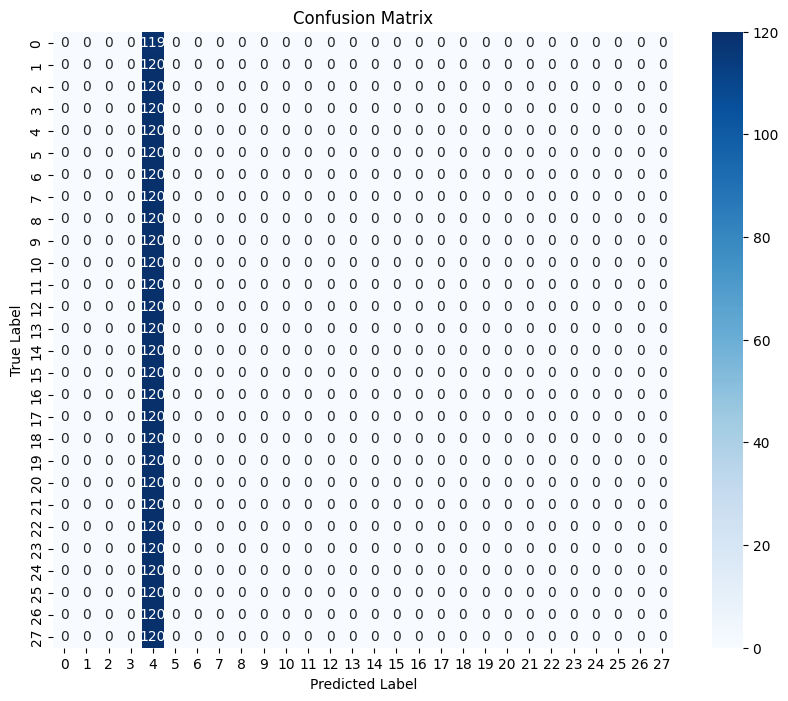

In [37]:
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

model.eval()
all_preds = []
all_targets = []

with torch.no_grad():
    for data, target in test_loader:
        data, target = data.to(device), target.to(device)
        output = model(data)
        pred = output.argmax(dim=1, keepdim=True)
        all_preds.append(pred.cpu().numpy())
        all_targets.append(target.cpu().numpy())

all_preds = np.concatenate(all_preds)
all_targets = np.concatenate(all_targets)

# Calculate the confusion matrix
cm = confusion_matrix(all_targets, all_preds)

# Visualize the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

## Plot Training History


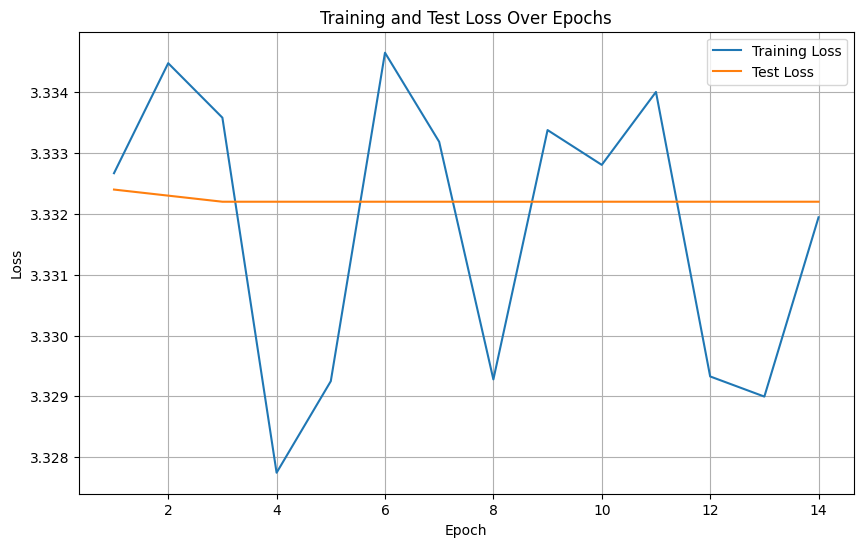

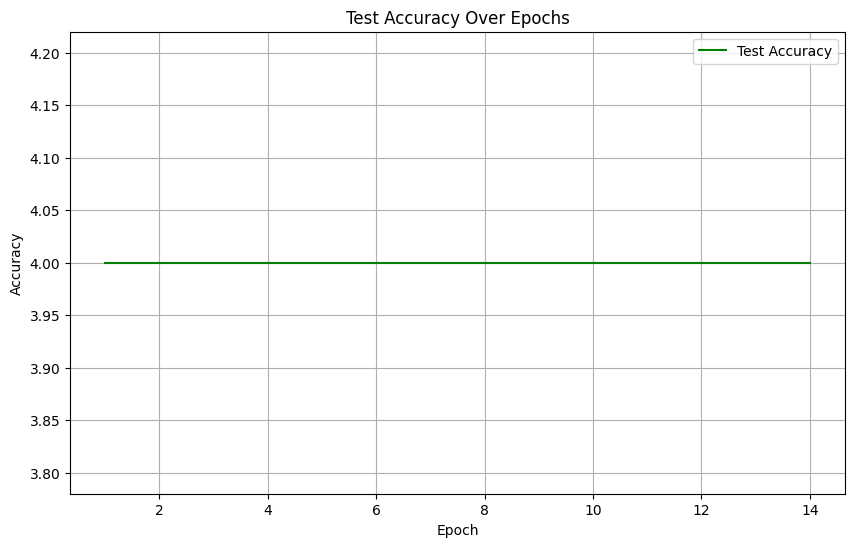

Plots generated successfully.


In [40]:
import matplotlib.pyplot as plt
import re

training_output = """
Train Epoch: 1 [0/13439 (0%)]	Loss: 3.330350
Train Epoch: 1 [640/13439 (5%)]	Loss: 3.331014
Train Epoch: 1 [1280/13439 (10%)]	Loss: 3.336770
Train Epoch: 1 [1920/13439 (14%)]	Loss: 3.330358
Train Epoch: 1 [2560/13439 (19%)]	Loss: 3.331124
Train Epoch: 1 [3200/13439 (24%)]	Loss: 3.333902
Train Epoch: 1 [3840/13439 (29%)]	Loss: 3.330906
Train Epoch: 1 [4480/13439 (33%)]	Loss: 3.331083
Train Epoch: 1 [5120/13439 (38%)]	Loss: 3.330597
Train Epoch: 1 [5760/13439 (43%)]	Loss: 3.334386
Train Epoch: 1 [6400/13439 (48%)]	Loss: 3.334467
Train Epoch: 1 [7040/13439 (52%)]	Loss: 3.334909
Train Epoch: 1 [7680/13439 (57%)]	Loss: 3.330109
Train Epoch: 1 [8320/13439 (62%)]	Loss: 3.337615
Train Epoch: 1 [8960/13439 (67%)]	Loss: 3.331227
Train Epoch: 1 [9600/13439 (71%)]	Loss: 3.329740
Train Epoch: 1 [10240/13439 (76%)]	Loss: 3.338738
Train Epoch: 1 [10880/13439 (81%)]	Loss: 3.337048
Train Epoch: 1 [11520/13439 (86%)]	Loss: 3.325246
Train Epoch: 1 [12160/13439 (90%)]	Loss: 3.338653
Train Epoch: 1 [12800/13439 (95%)]	Loss: 3.332669

Test set: Average loss: 3.3324, Accuracy: 120/3359 (4%)

Train Epoch: 2 [0/13439 (0%)]	Loss: 3.338907
Train Epoch: 2 [640/13439 (5%)]	Loss: 3.326419
Train Epoch: 2 [1280/13439 (10%)]	Loss: 3.327474
Train Epoch: 2 [1920/13439 (14%)]	Loss: 3.333672
Train Epoch: 2 [2560/13439 (19%)]	Loss: 3.341239
Train Epoch: 2 [3200/13439 (24%)]	Loss: 3.330300
Train Epoch: 2 [3840/13439 (29%)]	Loss: 3.325610
Train Epoch: 2 [4480/13439 (33%)]	Loss: 3.327791
Train Epoch: 2 [5120/13439 (38%)]	Loss: 3.336626
Train Epoch: 2 [5760/13439 (43%)]	Loss: 3.332242
Train Epoch: 2 [6400/13439 (48%)]	Loss: 3.330572
Train Epoch: 2 [7040/13439 (52%)]	Loss: 3.329497
Train Epoch: 2 [7680/13439 (57%)]	Loss: 3.326877
Train Epoch: 2 [8320/13439 (62%)]	Loss: 3.339183
Train Epoch: 2 [8960/13439 (67%)]	Loss: 3.330570
Train Epoch: 2 [9600/13439 (71%)]	Loss: 3.333857
Train Epoch: 2 [10240/13439 (76%)]	Loss: 3.330822
Train Epoch: 2 [10880/13439 (81%)]	Loss: 3.330325
Train Epoch: 2 [11520/13439 (86%)]	Loss: 3.337569
Train Epoch: 2 [12160/13439 (90%)]	Loss: 3.326385
Train Epoch: 2 [12800/13439 (95%)]	Loss: 3.334478

Test set: Average loss: 3.3323, Accuracy: 120/3359 (4%)

Train Epoch: 3 [0/13439 (0%)]	Loss: 3.329930
Train Epoch: 3 [640/13439 (5%)]	Loss: 3.329745
Train Epoch: 3 [1280/13439 (10%)]	Loss: 3.322414
Train Epoch: 3 [1920/13439 (14%)]	Loss: 3.334516
Train Epoch: 3 [2560/13439 (19%)]	Loss: 3.336636
Train Epoch: 3 [3200/13439 (24%)]	Loss: 3.326684
Train Epoch: 3 [3840/13439 (29%)]	Loss: 3.328482
Train Epoch: 3 [4480/13439 (33%)]	Loss: 3.333269
Train Epoch: 3 [5120/13439 (38%)]	Loss: 3.328303
Train Epoch: 3 [5760/13439 (43%)]	Loss: 3.331639
Train Epoch: 3 [6400/13439 (48%)]	Loss: 3.327181
Train Epoch: 3 [7040/13439 (52%)]	Loss: 3.341170
Train Epoch: 3 [7680/13439 (57%)]	Loss: 3.333898
Train Epoch: 3 [8320/13439 (62%)]	Loss: 3.337927
Train Epoch: 3 [8960/13439 (67%)]	Loss: 3.327410
Train Epoch: 3 [9600/13439 (71%)]	Loss: 3.330210
Train Epoch: 3 [10240/13439 (76%)]	Loss: 3.340122
Train Epoch: 3 [10880/13439 (81%)]	Loss: 3.332906
Train Epoch: 3 [11520/13439 (86%)]	Loss: 3.332981
Train Epoch: 3 [12160/13439 (90%)]	Loss: 3.330324
Train Epoch: 3 [12800/13439 (95%)]	Loss: 3.333582

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 4 [0/13439 (0%)]	Loss: 3.333469
Train Epoch: 4 [640/13439 (5%)]	Loss: 3.334658
Train Epoch: 4 [1280/13439 (10%)]	Loss: 3.327493
Train Epoch: 4 [1920/13439 (14%)]	Loss: 3.332587
Train Epoch: 4 [2560/13439 (19%)]	Loss: 3.329396
Train Epoch: 4 [3200/13439 (24%)]	Loss: 3.335690
Train Epoch: 4 [3840/13439 (29%)]	Loss: 3.331485
Train Epoch: 4 [4480/13439 (33%)]	Loss: 3.334595
Train Epoch: 4 [5120/13439 (38%)]	Loss: 3.325495
Train Epoch: 4 [5760/13439 (43%)]	Loss: 3.334453
Train Epoch: 4 [6400/13439 (48%)]	Loss: 3.330696
Train Epoch: 4 [7040/13439 (52%)]	Loss: 3.337904
Train Epoch: 4 [7680/13439 (57%)]	Loss: 3.336461
Train Epoch: 4 [8320/13439 (62%)]	Loss: 3.330498
Train Epoch: 4 [8960/13439 (67%)]	Loss: 3.333003
Train Epoch: 4 [9600/13439 (71%)]	Loss: 3.334423
Train Epoch: 4 [10240/13439 (76%)]	Loss: 3.334266
Train Epoch: 4 [10880/13439 (81%)]	Loss: 3.336987
Train Epoch: 4 [11520/13439 (86%)]	Loss: 3.337052
Train Epoch: 4 [12160/13439 (90%)]	Loss: 3.331510
Train Epoch: 4 [12800/13439 (95%)]	Loss: 3.327744

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 5 [0/13439 (0%)]	Loss: 3.331392
Train Epoch: 5 [640/13439 (5%)]	Loss: 3.337006
Train Epoch: 5 [1280/13439 (10%)]	Loss: 3.332878
Train Epoch: 5 [1920/13439 (14%)]	Loss: 3.333159
Train Epoch: 5 [2560/13439 (19%)]	Loss: 3.331964
Train Epoch: 5 [3200/13439 (24%)]	Loss: 3.335599
Train Epoch: 5 [3840/13439 (29%)]	Loss: 3.329784
Train Epoch: 5 [4480/13439 (33%)]	Loss: 3.332548
Train Epoch: 5 [5120/13439 (38%)]	Loss: 3.330607
Train Epoch: 5 [5760/13439 (43%)]	Loss: 3.331712
Train Epoch: 5 [6400/13439 (48%)]	Loss: 3.329615
Train Epoch: 5 [7040/13439 (52%)]	Loss: 3.327808
Train Epoch: 5 [7680/13439 (57%)]	Loss: 3.331766
Train Epoch: 5 [8320/13439 (62%)]	Loss: 3.331930
Train Epoch: 5 [8960/13439 (67%)]	Loss: 3.326604
Train Epoch: 5 [9600/13439 (71%)]	Loss: 3.336341
Train Epoch: 5 [10240/13439 (76%)]	Loss: 3.335049
Train Epoch: 5 [10880/13439 (81%)]	Loss: 3.332475
Train Epoch: 5 [11520/13439 (86%)]	Loss: 3.333273
Train Epoch: 5 [12160/13439 (90%)]	Loss: 3.333491
Train Epoch: 5 [12800/13439 (95%)]	Loss: 3.329249

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 6 [0/13439 (0%)]	Loss: 3.332643
Train Epoch: 6 [640/13439 (5%)]	Loss: 3.332896
Train Epoch: 6 [1280/13439 (10%)]	Loss: 3.331042
Train Epoch: 6 [1920/13439 (14%)]	Loss: 3.333171
Train Epoch: 6 [2560/13439 (19%)]	Loss: 3.332364
Train Epoch: 6 [3200/13439 (24%)]	Loss: 3.333340
Train Epoch: 6 [3840/13439 (29%)]	Loss: 3.333250
Train Epoch: 6 [4480/13439 (33%)]	Loss: 3.331358
Train Epoch: 6 [5120/13439 (38%)]	Loss: 3.332868
Train Epoch: 6 [5760/13439 (43%)]	Loss: 3.335270
Train Epoch: 6 [6400/13439 (48%)]	Loss: 3.333725
Train Epoch: 6 [7040/13439 (52%)]	Loss: 3.336720
Train Epoch: 6 [7680/13439 (57%)]	Loss: 3.333262
Train Epoch: 6 [8320/13439 (62%)]	Loss: 3.331225
Train Epoch: 6 [8960/13439 (67%)]	Loss: 3.333074
Train Epoch: 6 [9600/13439 (71%)]	Loss: 3.336606
Train Epoch: 6 [10240/13439 (76%)]	Loss: 3.331354
Train Epoch: 6 [10880/13439 (81%)]	Loss: 3.331844
Train Epoch: 6 [11520/13439 (86%)]	Loss: 3.331993
Train Epoch: 6 [12160/13439 (90%)]	Loss: 3.333015
Train Epoch: 6 [12800/13439 (95%)]	Loss: 3.334650

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 7 [0/13439 (0%)]	Loss: 3.332798
Train Epoch: 7 [640/13439 (5%)]	Loss: 3.335854
Train Epoch: 7 [1280/13439 (10%)]	Loss: 3.329391
Train Epoch: 7 [1920/13439 (14%)]	Loss: 3.329376
Train Epoch: 7 [2560/13439 (19%)]	Loss: 3.333407
Train Epoch: 7 [3200/13439 (24%)]	Loss: 3.330619
Train Epoch: 7 [3840/13439 (29%)]	Loss: 3.335567
Train Epoch: 7 [4480/13439 (33%)]	Loss: 3.332054
Train Epoch: 7 [5120/13439 (38%)]	Loss: 3.331440
Train Epoch: 7 [5760/13439 (43%)]	Loss: 3.330367
Train Epoch: 7 [6400/13439 (48%)]	Loss: 3.328882
Train Epoch: 7 [7040/13439 (52%)]	Loss: 3.328407
Train Epoch: 7 [7680/13439 (57%)]	Loss: 3.330141
Train Epoch: 7 [8320/13439 (62%)]	Loss: 3.334427
Train Epoch: 7 [8960/13439 (67%)]	Loss: 3.333533
Train Epoch: 7 [9600/13439 (71%)]	Loss: 3.332099
Train Epoch: 7 [10240/13439 (76%)]	Loss: 3.330258
Train Epoch: 7 [10880/13439 (81%)]	Loss: 3.334071
Train Epoch: 7 [11520/13439 (86%)]	Loss: 3.332318
Train Epoch: 7 [12160/13439 (90%)]	Loss: 3.329219
Train Epoch: 7 [12800/13439 (95%)]	Loss: 3.333185

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 8 [0/13439 (0%)]	Loss: 3.333784
Train Epoch: 8 [640/13439 (5%)]	Loss: 3.328543
Train Epoch: 8 [1280/13439 (10%)]	Loss: 3.327547
Train Epoch: 8 [1920/13439 (14%)]	Loss: 3.332767
Train Epoch: 8 [2560/13439 (19%)]	Loss: 3.332079
Train Epoch: 8 [3200/13439 (24%)]	Loss: 3.332301
Train Epoch: 8 [3840/13439 (29%)]	Loss: 3.333839
Train Epoch: 8 [4480/13439 (33%)]	Loss: 3.332799
Train Epoch: 8 [5120/13439 (38%)]	Loss: 3.330276
Train Epoch: 8 [5760/13439 (43%)]	Loss: 3.332473
Train Epoch: 8 [6400/13439 (48%)]	Loss: 3.335462
Train Epoch: 8 [7040/13439 (52%)]	Loss: 3.331809
Train Epoch: 8 [7680/13439 (57%)]	Loss: 3.336573
Train Epoch: 8 [8320/13439 (62%)]	Loss: 3.333426
Train Epoch: 8 [8960/13439 (67%)]	Loss: 3.332703
Train Epoch: 8 [9600/13439 (71%)]	Loss: 3.330471
Train Epoch: 8 [10240/13439 (76%)]	Loss: 3.327797
Train Epoch: 8 [10880/13439 (81%)]	Loss: 3.331185
Train Epoch: 8 [11520/13439 (86%)]	Loss: 3.330285
Train Epoch: 8 [12160/13439 (90%)]	Loss: 3.330732
Train Epoch: 8 [12800/13439 (95%)]	Loss: 3.329278

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 9 [0/13439 (0%)]	Loss: 3.334207
Train Epoch: 9 [640/13439 (5%)]	Loss: 3.330198
Train Epoch: 9 [1280/13439 (10%)]	Loss: 3.333922
Train Epoch: 9 [1920/13439 (14%)]	Loss: 3.331250
Train Epoch: 9 [2560/13439 (19%)]	Loss: 3.329270
Train Epoch: 9 [3200/13439 (24%)]	Loss: 3.334507
Train Epoch: 9 [3840/13439 (29%)]	Loss: 3.335603
Train Epoch: 9 [4480/13439 (33%)]	Loss: 3.331342
Train Epoch: 9 [5120/13439 (38%)]	Loss: 3.331625
Train Epoch: 9 [5760/13439 (43%)]	Loss: 3.333284
Train Epoch: 9 [6400/13439 (48%)]	Loss: 3.332984
Train Epoch: 9 [7040/13439 (52%)]	Loss: 3.331191
Train Epoch: 9 [7680/13439 (57%)]	Loss: 3.333379
Train Epoch: 9 [8320/13439 (62%)]	Loss: 3.332432
Train Epoch: 9 [8960/13439 (67%)]	Loss: 3.330935
Train Epoch: 9 [9600/13439 (71%)]	Loss: 3.330282
Train Epoch: 9 [10240/13439 (76%)]	Loss: 3.329470
Train Epoch: 9 [10880/13439 (81%)]	Loss: 3.329746
Train Epoch: 9 [11520/13439 (86%)]	Loss: 3.330680
Train Epoch: 9 [12160/13439 (90%)]	Loss: 3.329410
Train Epoch: 9 [12800/13439 (95%)]	Loss: 3.333378

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 10 [0/13439 (0%)]	Loss: 3.335561
Train Epoch: 10 [640/13439 (5%)]	Loss: 3.332657
Train Epoch: 10 [1280/13439 (10%)]	Loss: 3.334611
Train Epoch: 10 [1920/13439 (14%)]	Loss: 3.332285
Train Epoch: 10 [2560/13439 (19%)]	Loss: 3.330191
Train Epoch: 10 [3200/13439 (24%)]	Loss: 3.331923
Train Epoch: 10 [3840/13439 (29%)]	Loss: 3.336853
Train Epoch: 10 [4480/13439 (33%)]	Loss: 3.329541
Train Epoch: 10 [5120/13439 (38%)]	Loss: 3.331269
Train Epoch: 10 [5760/13439 (43%)]	Loss: 3.334205
Train Epoch: 10 [6400/13439 (48%)]	Loss: 3.334242
Train Epoch: 10 [7040/13439 (52%)]	Loss: 3.333045
Train Epoch: 10 [7680/13439 (57%)]	Loss: 3.333251
Train Epoch: 10 [8320/13439 (62%)]	Loss: 3.331594
Train Epoch: 10 [8960/13439 (67%)]	Loss: 3.330849
Train Epoch: 10 [9600/13439 (71%)]	Loss: 3.332788
Train Epoch: 10 [10240/13439 (76%)]	Loss: 3.327988
Train Epoch: 10 [10880/13439 (81%)]	Loss: 3.332560
Train Epoch: 10 [11520/13439 (86%)]	Loss: 3.331604
Train Epoch: 10 [12160/13439 (90%)]	Loss: 3.327950
Train Epoch: 10 [12800/13439 (95%)]	Loss: 3.332806

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 11 [0/13439 (0%)]	Loss: 3.330765
Train Epoch: 11 [640/13439 (5%)]	Loss: 3.332628
Train Epoch: 11 [1280/13439 (10%)]	Loss: 3.333315
Train Epoch: 11 [1920/13439 (14%)]	Loss: 3.333984
Train Epoch: 11 [2560/13439 (19%)]	Loss: 3.334073
Train Epoch: 11 [3200/13439 (24%)]	Loss: 3.328765
Train Epoch: 11 [3840/13439 (29%)]	Loss: 3.337833
Train Epoch: 11 [4480/13439 (33%)]	Loss: 3.330767
Train Epoch: 11 [5120/13439 (38%)]	Loss: 3.332461
Train Epoch: 11 [5760/13439 (43%)]	Loss: 3.331019
Train Epoch: 11 [6400/13439 (48%)]	Loss: 3.329372
Train Epoch: 11 [7040/13439 (52%)]	Loss: 3.328332
Train Epoch: 11 [7680/13439 (57%)]	Loss: 3.337089
Train Epoch: 11 [8320/13439 (62%)]	Loss: 3.335444
Train Epoch: 11 [8960/13439 (67%)]	Loss: 3.328463
Train Epoch: 11 [9600/13439 (71%)]	Loss: 3.328863
Train Epoch: 11 [10240/13439 (76%)]	Loss: 3.329097
Train Epoch: 11 [10880/13439 (81%)]	Loss: 3.332105
Train Epoch: 11 [11520/13439 (86%)]	Loss: 3.332815
Train Epoch: 11 [12160/13439 (90%)]	Loss: 3.330779
Train Epoch: 11 [12800/13439 (95%)]	Loss: 3.334005

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 12 [0/13439 (0%)]	Loss: 3.330884
Train Epoch: 12 [640/13439 (5%)]	Loss: 3.332905
Train Epoch: 12 [1280/13439 (10%)]	Loss: 3.335533
Train Epoch: 12 [1920/13439 (14%)]	Loss: 3.332635
Train Epoch: 12 [2560/13439 (19%)]	Loss: 3.333240
Train Epoch: 12 [3200/13439 (24%)]	Loss: 3.331627
Train Epoch: 12 [3840/13439 (29%)]	Loss: 3.332157
Train Epoch: 12 [4480/13439 (33%)]	Loss: 3.334736
Train Epoch: 12 [5120/13439 (38%)]	Loss: 3.333283
Train Epoch: 12 [5760/13439 (43%)]	Loss: 3.335678
Train Epoch: 12 [6400/13439 (48%)]	Loss: 3.328390
Train Epoch: 12 [7040/13439 (52%)]	Loss: 3.336265
Train Epoch: 12 [7680/13439 (57%)]	Loss: 3.334722
Train Epoch: 12 [8320/13439 (62%)]	Loss: 3.335053
Train Epoch: 12 [8960/13439 (67%)]	Loss: 3.333923
Train Epoch: 12 [9600/13439 (71%)]	Loss: 3.333647
Train Epoch: 12 [10240/13439 (76%)]	Loss: 3.329613
Train Epoch: 12 [10880/13439 (81%)]	Loss: 3.332012
Train Epoch: 12 [11520/13439 (86%)]	Loss: 3.326979
Train Epoch: 12 [12160/13439 (90%)]	Loss: 3.332572
Train Epoch: 12 [12800/13439 (95%)]	Loss: 3.329327

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 13 [0/13439 (0%)]	Loss: 3.333649
Train Epoch: 13 [640/13439 (5%)]	Loss: 3.330476
Train Epoch: 13 [1280/13439 (10%)]	Loss: 3.332027
Train Epoch: 13 [1920/13439 (14%)]	Loss: 3.331324
Train Epoch: 13 [2560/13439 (19%)]	Loss: 3.332275
Train Epoch: 13 [3200/13439 (24%)]	Loss: 3.331216
Train Epoch: 13 [3840/13439 (29%)]	Loss: 3.331304
Train Epoch: 13 [4480/13439 (33%)]	Loss: 3.332635
Train Epoch: 13 [5120/13439 (38%)]	Loss: 3.333066
Train Epoch: 13 [5760/13439 (43%)]	Loss: 3.331210
Train Epoch: 13 [6400/13439 (48%)]	Loss: 3.330029
Train Epoch: 13 [7040/13439 (52%)]	Loss: 3.333746
Train Epoch: 13 [7680/13439 (57%)]	Loss: 3.332758
Train Epoch: 13 [8320/13439 (62%)]	Loss: 3.334877
Train Epoch: 13 [8960/13439 (67%)]	Loss: 3.334290
Train Epoch: 13 [9600/13439 (71%)]	Loss: 3.336893
Train Epoch: 13 [10240/13439 (76%)]	Loss: 3.333157
Train Epoch: 13 [10880/13439 (81%)]	Loss: 3.331004
Train Epoch: 13 [11520/13439 (86%)]	Loss: 3.331295
Train Epoch: 13 [12160/13439 (90%)]	Loss: 3.334008
Train Epoch: 13 [12800/13439 (95%)]	Loss: 3.328996

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Train Epoch: 14 [0/13439 (0%)]	Loss: 3.329159
Train Epoch: 14 [640/13439 (5%)]	Loss: 3.331534
Train Epoch: 14 [1280/13439 (10%)]	Loss: 3.333296
Train Epoch: 14 [1920/13439 (14%)]	Loss: 3.330869
Train Epoch: 14 [2560/13439 (19%)]	Loss: 3.333857
Train Epoch: 14 [3200/13439 (24%)]	Loss: 3.334099
Train Epoch: 14 [3840/13439 (29%)]	Loss: 3.333495
Train Epoch: 14 [4480/13439 (33%)]	Loss: 3.330459
Train Epoch: 14 [5120/13439 (38%)]	Loss: 3.334550
Train Epoch: 14 [5760/13439 (43%)]	Loss: 3.333595
Train Epoch: 14 [6400/13439 (48%)]	Loss: 3.336014
Train Epoch: 14 [7040/13439 (52%)]	Loss: 3.334980
Train Epoch: 14 [7680/13439 (57%)]	Loss: 3.333084
Train Epoch: 14 [8320/13439 (62%)]	Loss: 3.331275
Train Epoch: 14 [8960/13439 (67%)]	Loss: 3.331951
Train Epoch: 14 [9600/13439 (71%)]	Loss: 3.330588
Train Epoch: 14 [10240/13439 (76%)]	Loss: 3.330716
Train Epoch: 14 [10880/13439 (81%)]	Loss: 3.330603
Train Epoch: 14 [11520/13439 (86%)]	Loss: 3.335736
Train Epoch: 14 [12160/13439 (90%)]	Loss: 3.330419
Train Epoch: 14 [12800/13439 (95%)]	Loss: 3.331944

Test set: Average loss: 3.3322, Accuracy: 120/3359 (4%)

Training complete."""

train_losses = []
test_losses = []
test_accuracies = []
epochs = []

current_epoch_train_losses = {}

for line in training_output.split('\n'):
    if 'Train Epoch' in line and 'Loss' in line:
        match = re.search(r'Train Epoch: (\d+) \[.*?\]\tLoss: (\d+\.\d+)', line)
        if match:
            epoch = int(match.group(1))
            loss = float(match.group(2))
            current_epoch_train_losses[epoch] = loss # Store the last reported training loss for the epoch
    elif 'Test set' in line:
        match = re.search(r'Test set: Average loss: (\d+\.\d+), Accuracy: \d+/\d+ \((\d+)%\)', line)
        if match:
            test_loss = float(match.group(1))
            test_accuracy = float(match.group(2))
            # The test set line appears after all train logs for an epoch
            if current_epoch_train_losses:
                last_epoch = max(current_epoch_train_losses.keys())
                train_losses.append(current_epoch_train_losses[last_epoch])
                epochs.append(last_epoch)
                current_epoch_train_losses = {}

            test_losses.append(test_loss)
            test_accuracies.append(test_accuracy)

# Plotting Training and Test Loss
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_losses, label='Training Loss')
plt.plot(epochs, test_losses, label='Test Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Test Loss Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

# Plotting Test Accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, test_accuracies, label='Test Accuracy', color='green')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Over Epochs')
plt.legend()
plt.grid(True)
plt.show()

print("Plots generated successfully.")

A primeira parte, carregamento dos dados foi muito simples, só tive que ficar atento a quantidade de csvs retornados pelo dataset pois os nomes são muito parecidos, é fácil de se confundir. E então tive a dificuldade inicial:  a camada de saída do modelo foi configurada para 10 classes, enquanto o meu conjunto de dados tinha 28, uma vez que eu estava me baseando em projetos anteriores. Mas foi al simples de resolver.

E então, as imagens foram pré-processadas para a compatibilidade com o formato MNIST. Porém, os valores máximos dos pixels estavam próximos de zero após a normalização, o que achei estranho.

Já durante o treinamento, o modelo demonstrou um severo underfitting. A acurácia no conjunto de teste permaneceu estagnada em apenas 4% ao longo de todas as épocas, e a perda se manteve alta.

A matriz de confusão revelou que o modelo estava, na prática, prevendo a mesma classe para quase todas as entradas. Isso significa que o modelo não aprendeu nada significativo para diferenciar os caracteres árabes.

Para melhorar, acho que seria necessário alguns ajustes mais profundos na arquitetura da rede neural, nos hiperparâmetros ou uma revisão mais detalhada da fase de pré-processamento dos dados.